1° définir l'espace des états

2° les probabilités de transitions et la loi initiale

3° Vérifier l'existence théorique d'une loi stationnaire

4° Calculer la loi stationnaire

5° Simuler le jeu sur une grande période et vérifier numériquement la propriété de la stationnarité et les résultats qui en édcoulent.

6° Valider numériquement les propriétés théoriques de la chaîne Markov

Question 1 : Espace des états

Deux urnes, A et B, contiennent ensemble a boules numérotées de 1 à a. À chaque instant, une boule est choisie de manière uniforme et déplacée d'une urne à l'autre. On note Xn​ le nombre de boules présentes dans l’urne A à l’instant n, ce qui définit l’ensemble des états comme E={0,1,…,a}.

Dans ce cadre, si l’urne A est vide à un instant donné (état 0), elle contiendra nécessairement une boule à l’instant suivant avec une probabilité de 1.
Si l’urne A contient i boules à un instant donné, avec 0<i<a, alors à l’instant suivant, elle aura soit i−1 boules avec une probabilité i/a​, soit i+1 boules avec une probabilité a−i/a​.

Question 2 : Matrice de Transition


P =
\begin{pmatrix}
0 & 1 & 0 & 0 & \cdots & 0 & 0 & 0 \\
\frac{1}{a} & 0 & \frac{a - 1}{a} & 0 & \cdots & 0 & 0 & 0 \\
0 & \frac{2}{a} & 0 & \frac{a - 2}{a} & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & \frac{a - 1}{a} & 0 & \frac{1}{a} \\
0 & 0 & 0 & 0 & \cdots & 0 & 1 & 0
\end{pmatrix}

Concernant la condition initiale, nous pouvons par exemple prendre : X0​=0 semble etre un bon choix car X0=0  rend la convergence vers l’équilibre plus visible !




Question 3 : Loi Stationnaire

 Théorème de l'existence de la distribution stationnaire :

 Soit (Xn) une chaîne de Markov à ensemble d’états fini. Alors elle possède au moins une
loi de probabilité stationnaire.

De plus si (Xn) est irréductible, alors la loi de probabilité stationnaire est unique. On la
notera ν ; elle vérifie pour tout i dans E, ν(i) = 1
Ei[Ti] > 0 où Ti est le temps de premier
retour en i.

Or dans notre cas : il existe a+1 etats (0,1,...,a) et tous nos états communiquent : le processus est donc irréductible.

On a donc vérifié l'existence théorique d'une loi stationnaire!


Question 4 : Calcul de notre Loi Stationnaire

Au lieu de calculer directement l’espérance des temps d’atteinte, on peut déterminer la distribution stationnaire $ \nu $ en résolvant l’équation $ \nu = \nu P $. Cela revient à résoudre le système suivant :  

$
\nu_j = \sum_{i=0}^{a} \nu_i p_{i,j}, \quad \text{pour } 0 \leq j \leq a
$

On sait que ce système admet une solution unique lorsque les $ \nu_i $ sont strictement positifs et que leur somme est égale à 1. On peut donc reformuler les équations comme suit :  

$
\nu_0 = \frac{\nu_1}{a}, \quad \nu_a = \frac{\nu_{a-1}}{a}
$

$
\nu_k = \left(1 - \frac{k-1}{a} \right) \nu_{k-1} + \frac{k+1}{a} \nu_{k+1}, \quad \text{pour } 1 \leq k \leq a-1
$

En résolvant successivement, on trouve $ \nu_1 = a\nu_0 $, puis $ \nu_2 = \frac{a(a - 1)}{2} \nu_0 $, et plus généralement, par récurrence on montre :  

$
\nu_k = \binom{a}{k} \nu_0
$

En utilisant la condition de normalisation $ \sum_{k=0}^{a} \nu_k = 1 $, on obtient  

$
1 = \nu_0 \sum_{k=0}^{a} \binom{a}{k} = \nu_0 2^a
$

d’où  

$
\nu_0 = \frac{1}{2^a}
$

Ainsi, la distribution stationnaire suit une **loi binomiale** $ B(a, 1/2)  $, c’est-à-dire  

$
\nu_k = \frac{\binom{a}{k}}{2^a}
$

Le vecteur de la distribution stationnaire \( \pi \) est :

$
\pi = \left( \frac{\binom{a}{0}}{2^a}, \frac{\binom{a}{1}}{2^a}, \frac{\binom{a}{2}}{2^a}, \dots, \frac{\binom{a}{a}}{2^a} \right)
$

ou, de manière plus générale :

$
\pi = \left( \frac{\binom{a}{k}}{2^a}, \quad k = 0, 1, 2, \dots, a \right)
$

Enfin, on peut aussi en déduire que pour tout  $k $, l’espérance du temps moyen de retour en $ k$ est donnée par  :

$
\mathbb{E}_k[T_k] = \frac{2^a}{\binom{a}{k}}
$

In [ ]:
import numpy as np

# fonction generale :
# calculer la loi stationnaire à partir de la matrice de transition (try except pour la gestion du cas ou pas d etat stationnaire)
def loi_stationnaire_matrice(P):
    # matrice de transition est valide ou non
    if not np.allclose(P.sum(axis=1), 1):
        raise ValueError("La matrice de transition n'est pas valide : les lignes doivent sommer à 1.")

    # on resout  pi * (P - I) = 0, avec la contrainte pi * 1 = 1 en plusieurs etapes
    n = P.shape[0]

    #  matrice P - I transposee
    A = P.T - np.eye(n)
    A = np.vstack([A, np.ones(n)])  #contrainte sum(pi) = 1, on rajoute une ligne de 1 en bas

    b = np.zeros(n + 1)  # Le vecteur b (dernier élément égal à 1 pour la contrainte)
    b[-1] = 1

    # resolution du système linéaire A * pi = b pour trouver pi
    # on a bien les n  contraintesde pi * P = pi et la derniere contrainte de somme = 1
    try:
        pi = np.linalg.lstsq(A, b, rcond=None)[0] # résolution des équations avec la bibliotheque numpy (elle utilise la méthode des moindres carrés)
    except np.linalg.LinAlgError:
        raise ValueError("Le système n'a pas de solution unique ou la loi stationnaire n'existe pas.")


    if not np.isclose(np.sum(pi), 1): # np.isclose verifie que on est proche de la valeur voulu
        raise ValueError("La solution obtenue ne représente pas une loi de probabilité valide.")

    return pi

#  matrice de transition pour notre modèle de diffusion des urnes d'Ehrenfest
def matrice_transition(a):
    P = np.zeros((a+1, a+1))

    for i in range(a+1):
        if i == 0:
            P[i, i+1] = 1  # À partir de l'état 0, il y a une probabilité de 1 d'aller à l'état 1
        elif i == a:
            P[i, i-1] = 1  # À partir de l'état a, il y a une probabilité de 1 d'aller à l'état a-1
        else:
            P[i, i-1] = i / a  # Probabilité de transition à l'état i-1
            P[i, i+1] = (a - i) / a  # Probabilité de transition à l'état i+1

    return P

# a = 10 boules
a = 10
P = matrice_transition(a)

# Calcul loi stationnaire
try:
    pi = loi_stationnaire_matrice(P)
    print("Loi stationnaire pi :")
    print(pi)
except ValueError as e:
    print(f"Erreur : {e}")


Loi stationnaire pi :
[0.00097656 0.00976562 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976562 0.00097656]


In [ ]:

import scipy.special as sp

# fonction pour calculer le vecteur de la loi stationnaire pi : loi binomiale (a, 0.5)
def loi_stationnaire(a):
    # Calcul des coeffs pour chaque état
    pi = np.array([sp.comb(a, k) / (2**a) for k in range(a+1)])
    return pi


a = 10
pi = loi_stationnaire(a)


print("Vecteur de la loi stationnaire pi :")
print(pi)


Vecteur de la loi stationnaire pi :
[0.00097656 0.00976562 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976562 0.00097656]


In [ ]:
print (loi_stationnaire_matrice(P)- pi)

[-6.03900610e-17 -5.55111512e-17  1.94289029e-16  2.22044605e-16
  1.66533454e-16 -1.11022302e-16 -2.49800181e-16 -1.66533454e-16
 -1.17961196e-16 -1.38777878e-17 -5.55111512e-17]


On a ainsi validé le calcul théorique, car la différence entre les coefficients du vecteur obtenu numériquement et ceux du vecteur théorique est infime, de l'ordre de 10 puissance −17.

Question 5 / 6 : Simulation sur une grande période & validation numériqueme des propriétés théoriques de la chaîne Markov

Ici on utilise une loi uniforme pour la condition initiale, afin de verifier que notre chaîne converge toujours vers sa distribution stationnaire et ce indépendamment de l’état initial (vrai pour une chaîne de Markov irréductible et apériodique ).

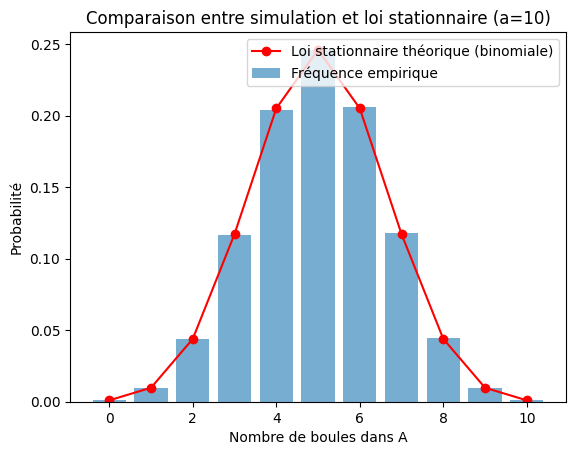

Erreur moyenne entre les fréquences empiriques et la loi stationnaire : 0.00031364772727272486


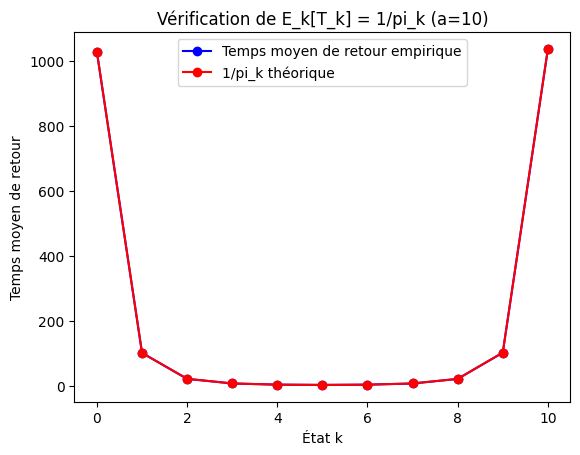

Erreur moyenne entre temps moyen de retour et 1/pi_k : 0.2025385203161936


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom

def simulate_ehrenfest(a, steps):
    X = np.zeros(steps, dtype=int)  # vecteur pr stocker les États
    X[0] = np.random.randint(0, a+1)  # Loi uniforme pr la CI (nb de boules en A pr t=0)

    for t in range(1, steps):
        boule = np.random.randint(0, a)  # une boule au hasard
        if boule < X[t-1]:  # Si elle est dans A, on la déplace vers B
            X[t] = X[t-1] - 1
        else:  # Sinon, on la met dans A
            X[t] = X[t-1] + 1

    return X

def verify_stationarity(X, a):
    """ Compare la fréquence empirique avec la loi théorique binomiale B(a, 1/2) """
    unique, counts = np.unique(X, return_counts=True) # on recupere le nb de passages par etat dans X notre trajectoire
    empirical_freq = counts / np.sum(counts) # on calcul la frequence  pour chaque etat

    theoretical_pi = loi_stationnaire(a) # Loi stationnaire théorique

    plt.bar(unique, empirical_freq, alpha=0.6, label="Fréquence empirique")
    plt.plot(unique, theoretical_pi, 'ro-', label="Loi stationnaire théorique (binomiale)")
    plt.xlabel("Nombre de boules dans A")
    plt.ylabel("Probabilité")
    plt.legend()
    plt.title(f"Comparaison entre simulation et loi stationnaire (a={a})")
    plt.show()

    error = np.abs(empirical_freq - theoretical_pi)
    print(f"Erreur moyenne entre les fréquences empiriques et la loi stationnaire : {np.mean(error)}")

def mean_return_time(X, a):
    """ Vérifie que le temps moyen de retour à un état k suit E_k[T_k] = 1/pi_k """
    unique, counts = np.unique(X, return_counts=True) # de meme, on recupere le nb de passages par etat pour une trajectoire
    empirical_pi = counts / np.sum(counts) # on calcul la frequence de passage

    # vecteurs pour stocker les temps de retour et derniers passages
    return_times = {k: [] for k in unique}
    last_seen = {k: None for k in unique}

    for t, state in enumerate(X):
        if last_seen[state] is not None: # si deja visite
            return_times[state].append(t - last_seen[state]) # alors on ajoute le temps de retour au vecteur
        last_seen[state] = t # on on actualise la valeur du dernier passage apr cet etat

    # calcul des moyennes
    empirical_means = {k: np.mean(return_times[k]) if len(return_times[k]) > 0 else np.nan for k in unique}
    theoretical_means = {k: 1 / empirical_pi[k] if empirical_pi[k] > 0 else np.nan for k in unique}

    plt.plot(list(empirical_means.keys()), list(empirical_means.values()), 'bo-', label="Temps moyen de retour empirique")
    plt.plot(list(theoretical_means.keys()), list(theoretical_means.values()), 'ro-', label="1/pi_k théorique")
    plt.xlabel("État k")
    plt.ylabel("Temps moyen de retour")
    plt.legend()
    plt.title(f"Vérification de E_k[T_k] = 1/pi_k (a={a})")
    plt.show()

    error = np.nanmean(np.abs(np.array(list(empirical_means.values())) - np.array(list(theoretical_means.values()))))
    print(f"Erreur moyenne entre temps moyen de retour et 1/pi_k : {error}")

a = 10  # nb boules
steps = 1000000  # nb'itérations

# trajectoire utilisee
X = simulate_ehrenfest(a, steps)

# propriétés de la stationnarité
verify_stationarity(X, a)

# temps moyens de retour
mean_return_time(X, a)


On peut aussi vérifier que :
$
P(X_{k+1} = x_{k+1} \mid X_k = x_k, X_{k-1} = x_{k-1}, \dots, X_0 = x_0) = P(X_{k+1} = x_{k+1} \mid X_k = x_k)
$
Autrement dit, l'état futur dépend uniquement de l'état présent, pas du passé.


In [ ]:
a = 10  # nbe boules
steps = 10000000  # Nnb transitions simulées
X = simulate_ehrenfest(a, steps)

# Comptage des transitions P(X_{k+1} | X_k)
transition_counts = {} # on tuilise un dictionnaire
for k in range(steps - 1):
    state_k = X[k]
    state_k1 = X[k+1]
    if (state_k, state_k1) not in transition_counts:
        transition_counts[(state_k, state_k1)] = 0
    transition_counts[(state_k, state_k1)] += 1

# Comptage des transitions P(X_{k+1} | X_k, X_{k-1})
transition_counts_2 = {}
for k in range(1, steps - 1):
    state_km1 = X[k-1]
    state_k = X[k]
    state_k1 = X[k+1]
    if (state_km1, state_k, state_k1) not in transition_counts_2:
        transition_counts_2[(state_km1, state_k, state_k1)] = 0
    transition_counts_2[(state_km1, state_k, state_k1)] += 1

# Normalisation des distributions conditionnelles
#  on normalise par la somme de tous les comptes qui commencent par le même état k
transition_probs = {k: v / sum([v2 for k2, v2 in transition_counts.items() if k2[0] == k[0]])
                    for k, v in transition_counts.items()}

transition_probs_2 = {k: v / sum([v2 for k2, v2 in transition_counts_2.items() if k2[:2] == k[:2]])
                      for k, v in transition_counts_2.items()}

# Comparaison entre P(X_{k+1} | X_k) et P(X_{k+1} | X_k, X_{k-1})
differences = []
for (k_m1, k, k1), p2 in transition_probs_2.items():
    if (k, k1) in transition_probs:
        p1 = transition_probs[(k, k1)]
        differences.append(abs(p1 - p2))
print(differences)

mean_diff = np.mean(differences)
print(f"Différence moyenne entre P(X_k+1 | X_k) et P(X_k+1 | X_k, X_k-1) : {mean_diff:.5f}")

if mean_diff < 1e-3:
    print("✅ La propriété de Markov est numériquement validée.")
else:
    print("❌ La propriété de Markov semble violée (problème de simulation ?).")


[5.970987089454205e-05, 0.0034743758282705928, 0.0006768612279460795, 0.0003812302179417859, 4.843899566941978e-05, 0.0005398591471967862, 4.8412059190483525e-05, 0.0005398591471967307, 0.0005230537903945787, 0.0003958481407625447, 0.0012198402419079102, 0.000808831943456767, 0.0005230537903945232, 0.0008088319434568225, 4.8412059190539036e-05, 0.0002545476309001593, 0.0002545476309001038, 0.0002900168254459379, 0.0003812302179417304, 0.0002900168254459379, 0.0008655611638368199, 6.723553491294609e-06, 4.843899566930876e-05, 0.0012198402419078547, 0.0008655611638367366, 0.00039584814076251695, 0.0002528978191043141, 0.0015859470033370293, 0.0006768612279459685, 0.001585947003337057, 0.00025289781910432796, 0.0, 0.00227369967007085, 0.0034743758282705928, 6.7235534912807315e-06, 0.0, 5.9709870894569805e-05, 0.0022736996700707807]
Différence moyenne entre P(X_k+1 | X_k) et P(X_k+1 | X_k, X_k-1) : 0.00072
✅ La propriété de Markov est numériquement validée.
